In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error as mse
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

# EDA

In [147]:
# Load the dataset
housing = pd.read_csv('housing.csv')

In [148]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [149]:
# Check the dimensions of the dataset
print("Check the dimensions of the dataset:")
print(housing.shape)

Check the dimensions of the dataset:
(20640, 10)


In [150]:
# Check the data types of the columns
print("Check the data types of the columns:")
print(housing.info())

Check the data types of the columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [110]:
#Check for missing values
print(housing.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [112]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [113]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

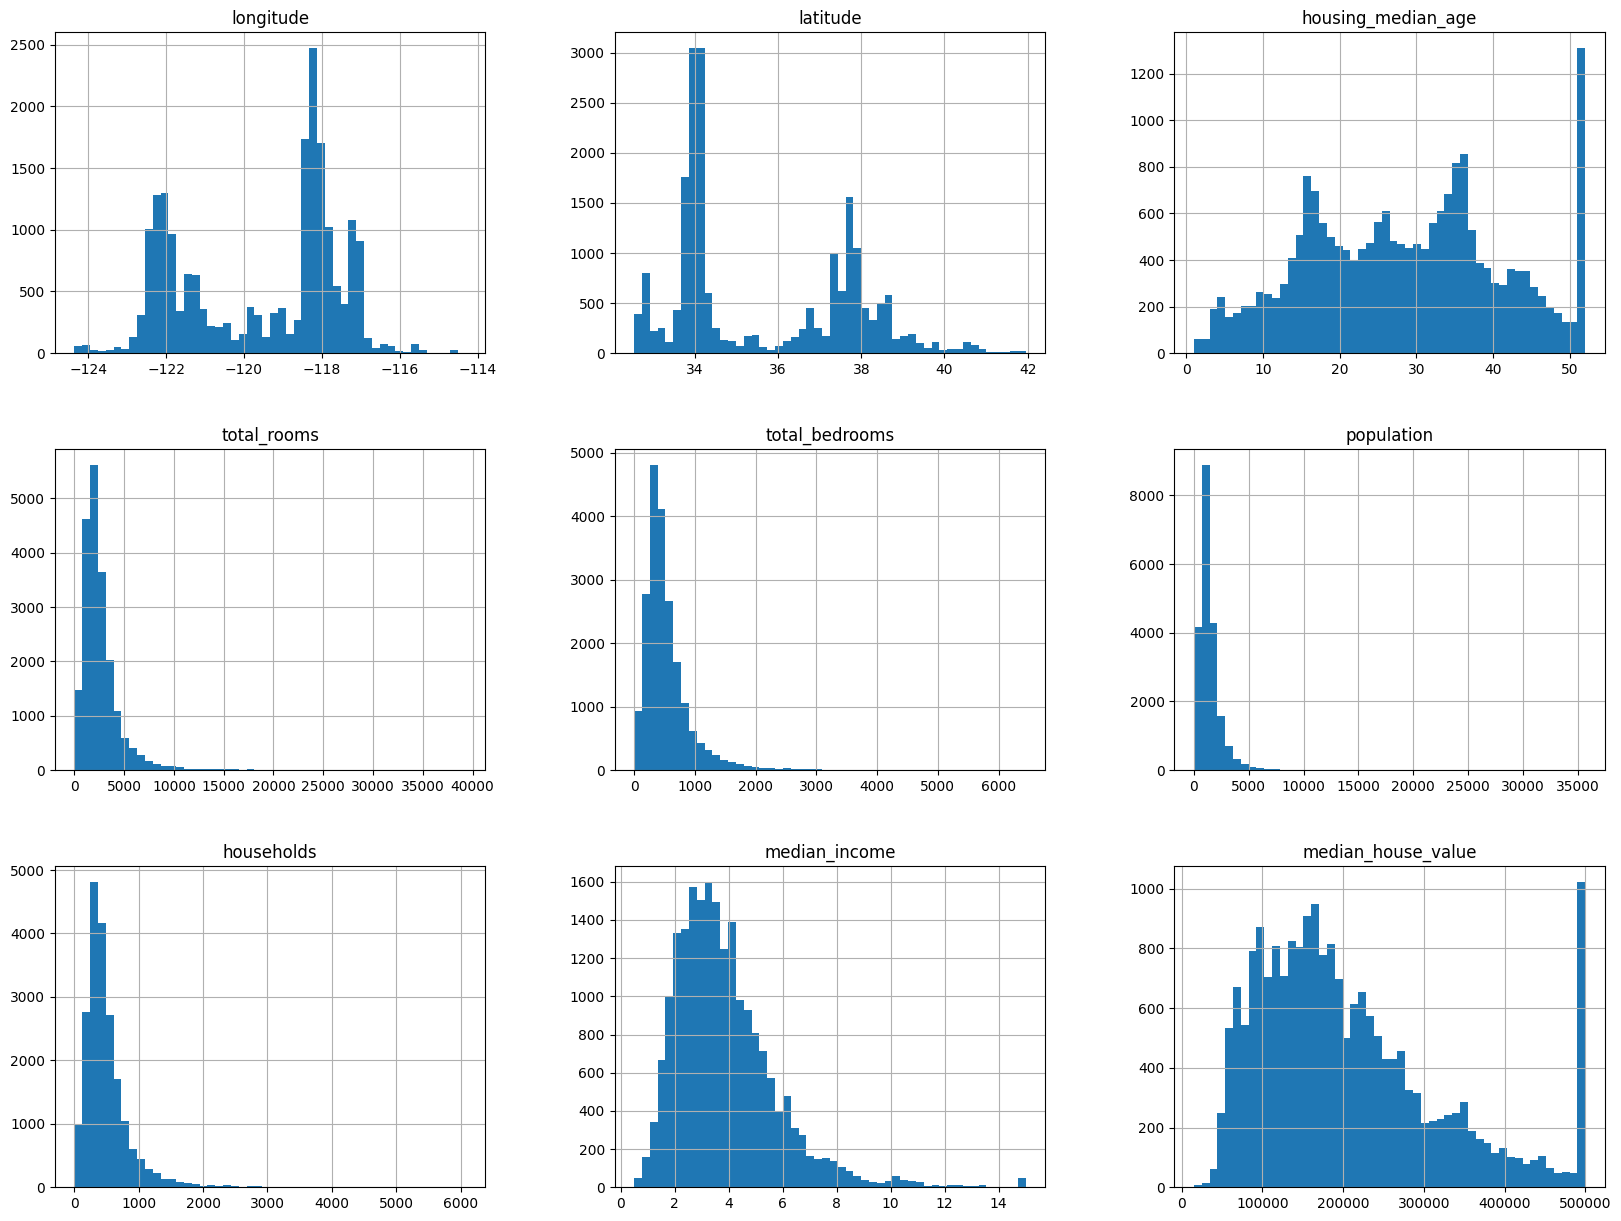

In [114]:
#histogram for each numeric attribute
housing.hist(bins=50, figsize=(20,15))

<Axes: xlabel='longitude', ylabel='latitude'>

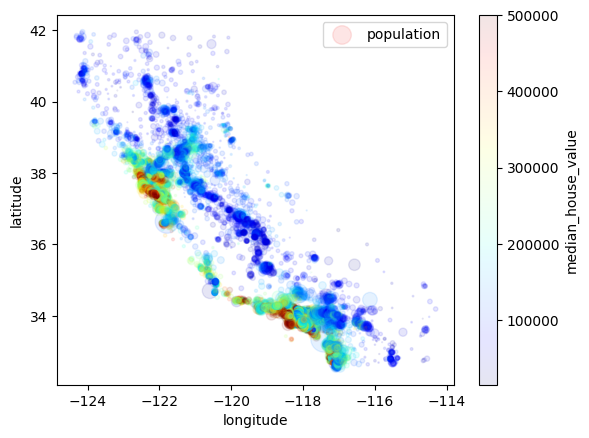

In [115]:
#Plotting the scatter plot
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1,
                s=housing["population"]/100, label="population",
                c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
                sharex=False)

In [116]:
housing_na=housing.dropna(subset=["total_bedrooms"])
#here I am dropping th eobservations with missing values for total_bedrooms
housing_na.shape

(20433, 10)

In [117]:
#here is how to turn category variables into bianary vairiables
dummies=pd.get_dummies(housing_na.ocean_proximity)
dummies.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False


In [118]:
housing_na_dummies = pd.concat([housing_na, dummies], axis='columns')
housing_na_dummies.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,False,False,False,True,False


In [119]:
# housing_clean = housing_na_dummies.drop(['ocean_proximity', 'ISLAND'], axis='columns')
housing_clean = housing_na_dummies.drop(['ocean_proximity'], axis='columns')
housing_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


## Correlation matrix
A correlation matrix is a table that shows the correlation coefficients between variables in a dataset. Correlation coefficients quantify the relationship between two variables, indicating whether they are positively or negatively related. The values in the correlation matrix range from -1 to 1, where:

* 1 indicates a perfect positive correlation (as one variable increases, the other does too).
* -1 indicates a perfect negative correlation (as one variable increases, the other decreases).
* 0 indicates no correlation (the variables are not linearly related).

<Axes: >

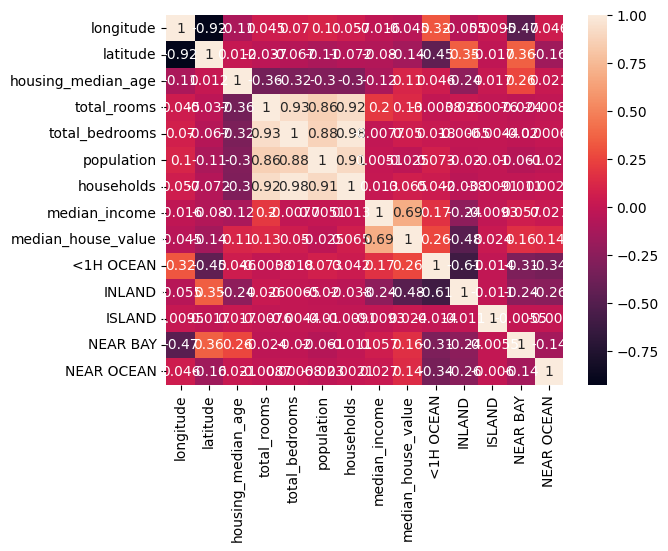

In [120]:
# Show corr_matrix as a heatmap
corr_matrix=housing_clean.corr()
sns.heatmap(corr_matrix, annot=True)

In [121]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688355
<1H OCEAN             0.257614
NEAR BAY              0.160526
NEAR OCEAN            0.140378
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
ISLAND                0.023525
population           -0.025300
longitude            -0.045398
latitude             -0.144638
INLAND               -0.484787
Name: median_house_value, dtype: float64

# Determine the Features & Target Variable

In [122]:
X=housing_clean.drop(['median_house_value'], axis='columns')
y=housing_clean['median_house_value']
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,False,False,False,True,False


# Split the Dataset to Train & Test

In [123]:
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size = 0.2, 
                                                    random_state=1984)

# Linear Regression
Linear regression is a simple and widely used regression method that models the relationship between the dependent variable (target) and one or more independent variables (features) as a linear equation. The goal is to find the best-fitting line that minimizes the sum of squared residuals between the predicted and actual values. Linear regression is easy to interpret and computationally efficient. However, it assumes a linear relationship between the variables, which may not always be appropriate for complex data.

In [124]:
from sklearn.linear_model import LinearRegression 
ls = LinearRegression()
ls.fit(X_train, y_train)
#predicting with LS
ls_pred = ls.predict(X_test)

## Predicting Test Data

In [125]:
performance = pd.DataFrame({'PREDICTIONS': ls_pred, 'ACTUAL VALUES':y_test})
performance['error']=performance['ACTUAL VALUES']-performance['PREDICTIONS']
performance.head()

,PREDICTIONS,ACTUAL VALUES,error
15175,315646.738470,328200.0,12553.261530
15424,235926.156196,156900.0,-79026.156196
16212,157003.325611,87200.0,-69803.325611
15356,172404.340246,141000.0,-31404.340246
1899,82931.270634,100800.0,17868.729366


# R-squared score
The R-squared score represents the proportion of the variance in the target variable that is predictable from the independent variables.



In [126]:
# Calculate the R-squared score
r2_score_ls = r2_score(y_test, ls_pred)
print("R-squared score:", r2_score_ls)

R-squared score: 0.6576677709626809


# SVM
Support Vector Regression (SVR) is an extension of the Support Vector Machine (SVM) algorithm for regression tasks. SVR aims to find a hyperplane that best fits the data points while allowing a certain margin of error (epsilon) around the fitted line. It is effective for non-linear regression problems and can handle high-dimensional data. SVR uses kernel functions to transform the data into a higher-dimensional space, where it can find a linear separation. It is particularly useful when the relationship between variables is non-linear.

In [127]:
#SVM regrassion
svr = SVR(kernel='linear', C=10, gamma='auto')
svr.fit(X_train, y_train)
#predicting with svr
svr_pred = svr.predict(X_test)

## Predicting Test Data

In [128]:
performance = pd.DataFrame({'PREDICTIONS': svr_pred, 'ACTUAL VALUES':y_test})
performance['error']=performance['ACTUAL VALUES']-performance['PREDICTIONS']
performance.head()

,PREDICTIONS,ACTUAL VALUES,error
15175,293285.427270,328200.0,34914.572730
15424,219014.420765,156900.0,-62114.420765
16212,160339.758747,87200.0,-73139.758747
15356,152024.876528,141000.0,-11024.876528
1899,108395.282168,100800.0,-7595.282168


# R-squared score
The R-squared score represents the proportion of the variance in the target variable that is predictable from the independent variables.



In [129]:
r2_score_svr = r2_score(y_test, svr_pred)
print("R-squared score:", r2_score_svr)

R-squared score: 0.6113816543986714


# KNN
K-Nearest Neighbors Regression (KNN) is a non-parametric algorithm that predicts the value of a data point by averaging the values of its k-nearest neighbors in the feature space. KNN does not make any assumptions about the underlying data distribution and can handle non-linear relationships between variables. However, it can be sensitive to noisy data and might require careful tuning of the hyperparameter k.

In [174]:
#Find the best value of hyperparameter
r = 0
i = 1
k = 1
while i <= math.sqrt(housing_na.shape[0]):
    knn= KNeighborsRegressor(i, weights='distance', algorithm='auto' , leaf_size= 20, metric= 'minkowski')  
    knn.fit(X_train, y_train)
    y_pred_knn=knn.predict(X_test)
    r2 = r2_score(y_test, y_pred_knn)
    if r2 > r:
        r = r2
        k = i
    i += 1

if(k%2 == 0):
    k=k+1

print("Best value of hyperparameter k:", k)

Best value of hyperparameter k: 23


In [165]:
knn = KNeighborsRegressor(k, weights='distance', algorithm='auto', leaf_size= 20, metric= 'minkowski')  
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_test)

## Predicting Test Data

In [166]:
performance = pd.DataFrame({'PREDICTIONS': y_pred_knn, 'ACTUAL VALUES':y_test})
performance['error']=performance['ACTUAL VALUES']-performance['PREDICTIONS']
performance.head()

,PREDICTIONS,ACTUAL VALUES,error
15175,323059.740045,328200.0,5140.259955
15424,188573.786192,156900.0,-31673.786192
16212,173274.938074,87200.0,-86074.938074
15356,138780.305477,141000.0,2219.694523
1899,181341.344459,100800.0,-80541.344459


# R-squared score
The R-squared score represents the proportion of the variance in the target variable that is predictable from the independent variables.



In [167]:
r2_score_knn = r2_score(y_test, y_pred_knn)
print("R-squared score:", r2_score_knn)

R-squared score: 0.3416411910437812


# Decision Tree
Decision trees are hierarchical tree-like structures that partition the feature space based on different attributes, creating decision rules to make predictions. In regression, each leaf node of the tree contains the predicted value based on the majority of data points in that region. Decision trees are interpretable and can capture complex relationships, but they are prone to overfitting, especially when the tree becomes deep.

In [134]:
from sklearn.tree import DecisionTreeRegressor
# Create the Decision Tree regression model
tree_model = DecisionTreeRegressor(random_state=42)

# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object with cross-validation
grid_search = GridSearchCV(tree_model, param_grid, cv=5)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and random state from the GridSearchCV
best_params = grid_search.best_params_
best_random_state = grid_search.best_estimator_.random_state

# Create the final Decision Tree model with the best hyperparameters and random state
final_tree_model = DecisionTreeRegressor(random_state=best_random_state, **best_params)

# Fit the final model to the training data
final_tree_model.fit(X_train, y_train)

y_pred_tree=final_tree_model.predict(X_test)

## Predicting Test Data

In [135]:
performance = pd.DataFrame({'PREDICTIONS': y_pred_tree, 'ACTUAL VALUES':y_test})
performance['error']=performance['ACTUAL VALUES']-performance['PREDICTIONS']
performance.head()

,PREDICTIONS,ACTUAL VALUES,error
15175,308665.260870,328200.0,19534.739130
15424,471473.363636,156900.0,-314573.363636
16212,126075.466667,87200.0,-38875.466667
15356,267855.050000,141000.0,-126855.050000
1899,124273.750000,100800.0,-23473.750000


# R-squared score
The R-squared score represents the proportion of the variance in the target variable that is predictable from the independent variables.



In [136]:
r2_score_tree = r2_score(y_test, y_pred_tree)
print("R-squared score:", r2_score_tree)

R-squared score: 0.7322115251618067


# AdaBoost
Adaboost (Adaptive Boosting) is an ensemble learning method that combines weak learners (typically decision trees) to create a strong learner. In each iteration, Adaboost assigns higher weights to misclassified data points, and subsequent learners focus more on those misclassifications. It sequentially builds learners, and their predictions are combined through a weighted majority vote. Adaboost is robust and can improve the performance of weak models.

In [137]:
from sklearn.ensemble import AdaBoostRegressor

# Create the AdaBoost regression model
adaboost_model = AdaBoostRegressor(random_state=42)

# Define the hyperparameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.5, 1.0]
}

# Create the GridSearchCV object with cross-validation
grid_search = GridSearchCV(adaboost_model, param_grid, cv=5)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters from the GridSearchCV
best_params = grid_search.best_params_

# Create the final AdaBoost model with the best hyperparameters
final_adaboost_model = AdaBoostRegressor(random_state=42, **best_params)

# Fit the final model to the training data
final_adaboost_model.fit(X_train, y_train)

# Make predictions on the test set
adaboost_pred = final_adaboost_model.predict(X_test)

## Predicting Test Data

In [138]:
performance = pd.DataFrame({'PREDICTIONS': adaboost_pred, 'ACTUAL VALUES':y_test})
performance['error']=performance['ACTUAL VALUES']-performance['PREDICTIONS']
performance.head()

,PREDICTIONS,ACTUAL VALUES,error
15175,355559.739837,328200.0,-27359.739837
15424,243346.586417,156900.0,-86446.586417
16212,130830.453072,87200.0,-43630.453072
15356,226708.378769,141000.0,-85708.378769
1899,101201.333693,100800.0,-401.333693


# R-squared score
The R-squared score represents the proportion of the variance in the target variable that is predictable from the independent variables.



In [139]:
r2_score_ada = r2_score(y_test, adaboost_pred)
print("R-squared score:", r2_score_ada)

R-squared score: 0.5997866715608661


# MLP
 Multi-layer Perceptron (MLP) Regression is a type of artificial neural network used for regression tasks. It consists of multiple layers of interconnected nodes (neurons) and can capture complex non-linear relationships in the data. MLPs require more data and computational resources for training but can be highly effective for high-dimensional and non-linear regression problems.

In [151]:
mlp_model = MLPRegressor(random_state=42)
mlp_model.fit(X_train, y_train)

# Make predictions on the test set
mlp_pred = mlp_model.predict(X_test)

/Users/diganto/opt/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Predicting Test Data

In [141]:
performance = pd.DataFrame({'PREDICTIONS': mlp_pred, 'ACTUAL VALUES':y_test})
performance['error']=performance['ACTUAL VALUES']-performance['PREDICTIONS']
performance.head()

,PREDICTIONS,ACTUAL VALUES,error
15175,255382.388816,328200.0,72817.611184
15424,221061.931154,156900.0,-64161.931154
16212,228180.005987,87200.0,-140980.005987
15356,152542.955116,141000.0,-11542.955116
1899,190067.806847,100800.0,-89267.806847


# R-squared score
The R-squared score represents the proportion of the variance in the target variable that is predictable from the independent variables.



In [142]:
r2_score_mlp = r2_score(y_test, mlp_pred)
print("R-squared score:", r2_score_mlp)

R-squared score: 0.3861486450128315


# Comparing Results

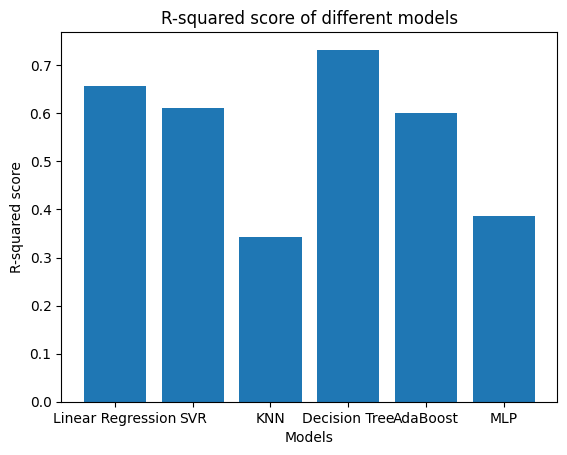

In [143]:
r2_scores = [r2_score_ls, r2_score_svr, r2_score_knn, r2_score_tree, r2_score_ada, r2_score_mlp]
models = ['Linear Regression', 'SVR', 'KNN', 'Decision Tree', 'AdaBoost', 'MLP']
plt.bar(models, r2_scores)
plt.xlabel('Models')
plt.ylabel('R-squared score')
plt.title('R-squared score of different models')
plt.show()

In [144]:
#find the best model
best_model = models[r2_scores.index(max(r2_scores))]
print("The best model is", best_model, "with an R-squared score of", max(r2_scores))

The best model is Decision Tree with an R-squared score of 0.7322115251618067


# RMSE

In [152]:
# Find the RMSE and differnce test and train for each model
rmse_ls = mse(ls.predict(X_train), y_train, squared=False), mse(ls.predict(X_test), y_test, squared=False)
rmse_svr = mse(svr.predict(X_train), y_train, squared=False), mse(svr.predict(X_test), y_test, squared=False)
rmse_knn = mse(knn.predict(X_train), y_train, squared=False), mse(knn.predict(X_test), y_test, squared=False)
rmse_tree = mse(final_tree_model.predict(X_train), y_train, squared=False), mse(final_tree_model.predict(X_test), y_test, squared=False)
rmse_ada = mse(final_adaboost_model.predict(X_train), y_train, squared=False), mse(final_adaboost_model.predict(X_test), y_test, squared=False)
rmse_mlp = mse(mlp_model.predict(X_train), y_train, squared=False), mse(mlp_model.predict(X_test), y_test, squared=False)

# print the RMSE for each model
print("RMSE for Linear Regression:", rmse_ls)
print("RMSE for SVR:", rmse_svr)
print("RMSE for KNN:", rmse_knn)
print("RMSE for Decision Tree:", rmse_tree)
print("RMSE for AdaBoost:", rmse_ada)
print("RMSE for MLP:", rmse_mlp)

RMSE for Linear Regression: (68588.64342750395, 68853.18475883658)
RMSE for SVR: (72748.95947656415, 73360.4165068934)
RMSE for KNN: (0.0, 95484.18917365724)
RMSE for Decision Tree: (49149.54463587941, 60897.02547788737)
RMSE for AdaBoost: (74193.84052405276, 74446.77912042274)
RMSE for MLP: (91243.19290110657, 92200.1756674304)


In [173]:
#make a table for the r2 scores and rmse
r2_scores = [r2_score_ls, r2_score_svr, r2_score_knn, r2_score_tree, r2_score_ada, r2_score_mlp]
rmse_train = [rmse_ls[0], rmse_svr[0], rmse_knn[0], rmse_tree[0], rmse_ada[0], rmse_mlp[0]]
rmse_test = [rmse_ls[1], rmse_svr[1], rmse_knn[1], rmse_tree[1], rmse_ada[1], rmse_mlp[1]]
models = ['Linear Regression', 'SVR', 'KNN', 'Decision Tree', 'AdaBoost', 'MLP']
results = pd.DataFrame({'R-squared score': r2_scores, 'RMSE (train)': rmse_train, 'RMSE (test)': rmse_test}, index=models)

# Sort with the R-squared score
sort_results = results.sort_values('R-squared score', ascending=False)
sort_results

,R-squared score,RMSE (train),RMSE (test)
Decision Tree,0.732212,49149.544636,60897.025478
Linear Regression,0.657668,68588.643428,68853.184759
SVR,0.611382,72748.959477,73360.416507
AdaBoost,0.599787,74193.840524,74446.779120
MLP,0.386149,91243.192901,92200.175667
KNN,0.341641,0.000000,95484.189174


# Predicting California Housing Prices using Supervised Regression Methods

In this project, we aimed to predict housing prices in various districts across California using several supervised regression algorithms. We utilized the California Housing Prices dataset sourced from Kaggle, which provides valuable information on district-specific attributes such as population, median income, and median housing price.

# California Housing dataset

The California Housing Prices dataset available on Kaggle, created by user camnugent, provides information on housing prices in various districts across California.

**Data Set Characteristics:**

- Number of Instances: 20640

- Number of Attributes: 10

- Attribute Information:

    - longitude

    - latitude

    - housing_median_age

    - total_rooms

    - total_bedrooms

    - population

    - households

    - median_income

    - median_house_value

    - ocean_proximity

# Workflow 

1. **Data Preprocessing and EDA:**
The dataset is loaded and being analyzed. Find out the missing and handle missing value by drop missing value's rows. One of the biggest impact of Missing Data is, It can bias the results of the machine learning models or reduce the accuracy of the model. So, It is very important to handle missing values.

2. **Linear Regression:**
Linear regression is a simple and widely used regression method that models the relationship between the dependent variable (target) and one or more independent variables (features) as a linear equation. The goal is to find the best-fitting line that minimizes the sum of squared residuals between the predicted and actual values. Linear regression is easy to interpret and computationally efficient. However, it assumes a linear relationship between the variables, which may not always be appropriate for complex data.

3. **Support Vector Regression (SVM):**
Support Vector Regression (SVR) is an extension of the Support Vector Machine (SVM) algorithm for regression tasks. SVR aims to find a hyperplane that best fits the data points while allowing a certain margin of error (epsilon) around the fitted line. It is effective for non-linear regression problems and can handle high-dimensional data. SVR uses kernel functions to transform the data into a higher-dimensional space, where it can find a linear separation. It is particularly useful when the relationship between variables is non-linear.

4. **K-Nearest Neighbors Regression (KNN):**
K-Nearest Neighbors Regression (KNN) is a non-parametric algorithm that predicts the value of a data point by averaging the values of its k-nearest neighbors in the feature space. KNN does not make any assumptions about the underlying data distribution and can handle non-linear relationships between variables. However, it can be sensitive to noisy data and might require careful tuning of the hyperparameter k.

5. **Decision Trees:**
Decision trees are hierarchical tree-like structures that partition the feature space based on different attributes, creating decision rules to make predictions. In regression, each leaf node of the tree contains the predicted value based on the majority of data points in that region. Decision trees are interpretable and can capture complex relationships, but they are prone to overfitting, especially when the tree becomes deep.

6. **Adaboost:**
Adaboost (Adaptive Boosting) is an ensemble learning method that combines weak learners (typically decision trees) to create a strong learner. In each iteration, Adaboost assigns higher weights to misclassified data points, and subsequent learners focus more on those misclassifications. It sequentially builds learners, and their predictions are combined through a weighted majority vote. Adaboost is robust and can improve the performance of weak models.

7. **Multi-layer Perceptron (MLP) Regression:**
Multi-layer Perceptron (MLP) Regression is a type of artificial neural network used for regression tasks. It consists of multiple layers of interconnected nodes (neurons) and can capture complex non-linear relationships in the data. MLPs require more data and computational resources for training but can be highly effective for high-dimensional and non-linear regression problems.

8. **The R-squared (R2) score:**
The R-squared (R2) score, also known as the coefficient of determination, is a statistical measure that quantifies the proportion of the variance in the dependent variable (target) that is explained by the independent variables (features) in a regression model. It is a commonly used evaluation metric for regression tasks. The R2 score ranges from 0 to 1, where:

* R2 = 1 indicates that the regression model perfectly fits the data, capturing all the variability of the dependent variable based on the independent variables. In other words, the model's predictions match the actual data points with no errors.
* R2 = 0 suggests that the regression model does not explain any variability in the dependent variable, and the predictions are equivalent to the mean of the dependent variable.
* R2 < 0 indicates that the model performs worse than predicting the mean, and it might be indicating overfitting.

# Model Evaluation:
For each of the regression algorithms, we trained the models on the training dataset and evaluated their performance on the test dataset. We used the R-squared (R2) score as the evaluation metric to measure the proportion of the variance in the target variable explained by the models' predictions.

# Result:

| Model            | R-squared score | RMSE (train) | RMSE (test)   |
|------------------|-----------------|--------------|---------------|
| Decision Tree    |    0.732212     | 49149.544636 | 60897.025478  |
| Linear Regression|    0.657668     | 68588.643428 | 68853.184759  |
| SVR              |    0.611382     | 72748.959477 | 73360.416507  |
| AdaBoost         |    0.599787     | 74193.840524 | 74446.779120  |
| MLP              |    0.386149     | 91243.192901 | 92200.175667  |
| KNN              |    0.341641     |     0.000000 | 95484.189174  |

Sort by R-squared score

# Best Result:
Based on the R-squared (R2) score, the Decision Tree Regression algorithm achieved the highest performance on the test dataset, with an R-squared score of 0.7322. This score indicates that approximately 73.22% of the variance in housing prices was explained by the Decision Tree model's predictions. As a result, we consider the Decision Tree Regression algorithm as the applicable method for predicting housing prices in California districts in this project.

# Conclusion:
I applied various supervised regression methods to predict California housing prices. The Decision Tree Regression algorithm demonstrated the best performance, achieving an R-squared score of 0.7322 on the test dataset. This model can serve as a valuable tool for predicting housing prices.